Ex. 1. ArƒÉta≈£i echivalen≈£a datƒÉ √Æn exemplul de la pagina 15 a cursului 3. Mai precis, arƒÉta≈£i cƒÉ dacƒÉ A, B ≈üi C sunt variabile
aleatoare discrete, atunci

A,C independente ‚à£ B,
dacƒÉ ≈üi numai dacƒÉ existƒÉ douƒÉ func≈£ii pozitive œÜA,B, œÜB,C ≈üi o constantƒÉ de normalizare k > 0 astfel √Ænc√¢t

P(A = xA, B = xB,C = xC) = 1/k œÜA,B(xA, xB)œÜB,C(xB, xC), ‚àÄxA,xB,xC.

√éncƒÉrca≈£i argumentul fie √Æn Markdown/Latex, fie ca foto la foia de lucru.

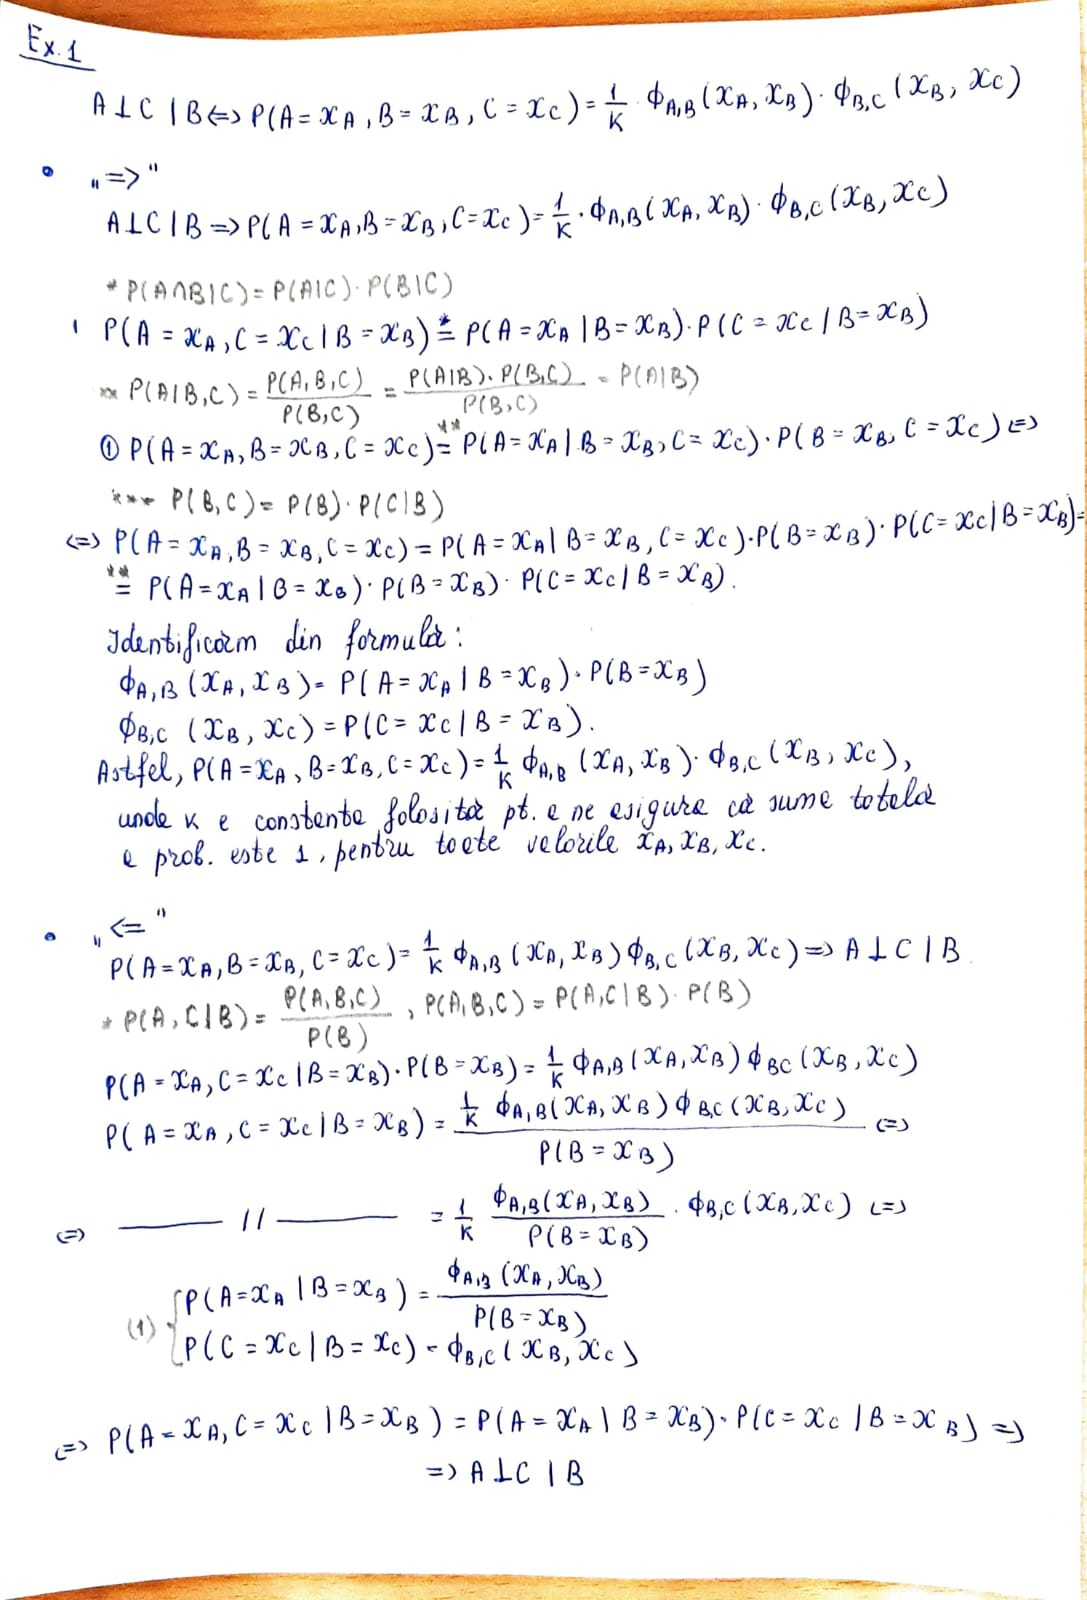

### ProblemƒÉ

ConsiderƒÉm o regiune √Æn care observƒÉm vremea la mai multe sta»õii meteo, \( S_1, S_2, ..., S_n \). Fiecare sta»õie raporteazƒÉ una dintre cele trei stƒÉri posibile:
- ‚ÄûSoare‚Äù
- ‚ÄûPloaie‚Äù
- ‚ÄûNori‚Äù

Scopul este de a prezice starea vremii la fiecare sta»õie meteo, lu√¢nd √Æn considerare dependen»õele dintre sta»õiile adiacente. Vremea la o sta»õie depinde direct de vremea la sta»õiile vecine.

Vom folosi o **re»õea MarkovianƒÉ** pentru a modela vremea la mai multe loca»õii »ôi vom inferea asupra vremii la o sta»õie necunoscutƒÉ, pe baza datelor de la vecini.

#### Date de intrare (introduse de cƒÉtre utilizator):
1. **NumƒÉrul de sta»õii meteo**, \( n \).
2. **Muchiile corespunzƒÉtoare re»õelei Markoviene**, adicƒÉ vecinii fiecƒÉrei sta»õii. Vom presupune cƒÉ re»õeaua este aciclicƒÉ (nu existƒÉ clici de dimensiune 3).
3. **ProbabilitƒÉ»õile ini»õiale** pentru fiecare sta»õie (exemplu: \( P(S) = 0.5 \), \( P(P) = 0.3 \), \( P(N) = 0.2 \)).

#### Matricea de poten»õial pentru fiecare pereche de sta»õii vecine:


\begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.3 & 0.6
\end{bmatrix}


AceastƒÉ matrice reprezintƒÉ poten»õialul de interac»õiune √Æntre stƒÉrile vremii la sta»õii vecine: Soare (S), Ploaie (P) »ôi Nori (N).

In [ ]:
!pip install pgmpy

In [ ]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np

n = int(input("Introduce»õi numƒÉrul de sta»õii: "))
edges = []

for i in range(n-1):
    edge = tuple(map(int, input(f"Introduce»õi muchia: ").split(',')))
    edges.append(edge)

markov_network = MarkovNetwork()

#nodurile pentru fiecare statie
stations = [f'Station_{i}' for i in range(n)]
markov_network.add_nodes_from(stations)

#muchiile intre statii
markov_network.add_edges_from([(f'Station_{edge[0]}', f'Station_{edge[1]}') for edge in edges])

#matricea de potential
potential_matrix = np.array([[0.7, 0.2, 0.1],
                             [0.2, 0.6, 0.2],
                             [0.1, 0.3, 0.6]])

for edge in edges:
    #un factor pt fiecare 2 statii vecine
    factor = DiscreteFactor(
        variables=[f'Station_{edge[0]}', f'Station_{edge[1]}'],
        cardinality=[3, 3],  #3 stari
        values=potential_matrix.flatten()
    )
    markov_network.add_factors(factor)

#probabilitatile initiale
initial_probs = {}
for i in range(n):
    probs = list(map(float, input(f"Introduce»õi probabilitƒÉ»õile pentru Station_{i} (Soare, Ploaie, Nori): ").split(',')))
    initial_probs[f'Station_{i}'] = probs

for station, probs in initial_probs.items():
    factor = DiscreteFactor(
        variables=[station],
        cardinality=[3],  # 3 stƒÉri
        values=probs
    )
    markov_network.add_factors(factor)

bp = BeliefPropagation(markov_network)
result = bp.map_query(variables=stations)

for station, weather in result.items():
    weather_str = ['Soare', 'Ploaie', 'Nori'][weather]
    print(f"Vremea prezisƒÉ la {station}: {weather_str}")

Introduce»õi numƒÉrul de sta»õii: 3
Introduce»õi muchia: 0,1
Introduce»õi muchia: 1,2
Introduce»õi probabilitƒÉ»õile pentru Station_0 (Soare, Ploaie, Nori): 0.2, 0.4, 0.4
Introduce»õi probabilitƒÉ»õile pentru Station_1 (Soare, Ploaie, Nori): 0.6, 0.1, 0.3
Introduce»õi probabilitƒÉ»õile pentru Station_2 (Soare, Ploaie, Nori): 0.2, 0.1, 0.7
Vremea prezisƒÉ la Station_0: Nori
Vremea prezisƒÉ la Station_1: Nori
Vremea prezisƒÉ la Station_2: Nori



Ex 3
O problemƒÉ clasicƒÉ care poate fi rezolvatƒÉ folosind Markov Random Fields (MRF) este cea a denoising-ului imaginii, unde obiectivul este de a curƒÉ≈£a o imagine cu zgomot (noise) prin estimarea valorii fiecƒÉrui pixel, baz√¢ndu-ne pe vecinii sƒÉi.

a) Imagine originalƒÉ
Alege≈£i o imagine de dimensiune foarte micƒÉ (de ordinul 5 √ó 5), care va fi utilizatƒÉ drept imagine originalƒÉ.
AceastƒÉ imagine poate fi creatƒÉ √Æn mod determinist (de exemplu, av√¢nd un model regulat) sau aleatoriu (gener√¢nd valori pentru pixeli la √Ænt√¢mplare).

b)
Alege≈£i la √Ænt√¢mplare un numƒÉr de pixeli (√Æn jur de 10%) pentru a fi modifica≈£i.
Crea≈£i astfel o versiune zgomotoasƒÉ a imaginii originale.


ConsiderƒÉm un grid 2D, √Æn care fiecare nod (pixel) este conectat la cei patru vecini direc≈£i (N, S, E, W). Energia totalƒÉ
ùê∏
(
ùë•
)
E(x) a unui grid poate fi descrisƒÉ prin douƒÉ componente:

  * O componentƒÉ care penalizeazƒÉ discrepan»õele √Æntre variabilele observate »ôi cele latente (valorile pixelilor).
  * O componentƒÉ care penalizeazƒÉ discrepan»õele √Æntre pixeli vecini, favoriz√¢nd o imagine mai uniformƒÉ.
Func≈£ia de energie poate fi scrisƒÉ astfel:

ùê∏
(
ùë•
)
=
‚àë
ùëñ
ùúÜ
(
ùë•
ùëñ
‚àí
ùë¶
ùëñ
)
2
+
‚àë
(
ùëñ
,
ùëó
)
(
ùë•
ùëñ
‚àí
ùë•
ùëó
)
2
,
E(x)=
i
‚àë
‚Äã
 Œª(x
i
‚Äã
 ‚àíy
i
‚Äã
 )
2
 +
(i,j)
‚àë
‚Äã
 (x
i
‚Äã
 ‚àíx
j
‚Äã
 )
2
 ,
unde:

ùë•
ùëñ
x
i
‚Äã
  este pixelul curat de estimat;
ùë¶
ùëñ
y
i
‚Äã
  este pixelul observat (cu zgomot);
ùúÜ
Œª este un factor de regularizare care controleazƒÉ influen≈£a zgomotului, ales de utilizator;
(
ùëñ
,
ùëó
)
(i,j) reprezintƒÉ perechi de pixeli vecini.

c) Definirea unei re≈£ele Markoviene
Folosind pgmpy, vom defini o re»õea MarkovianƒÉ care descrie contextul de mai sus. AceastƒÉ re»õea va modela rela»õiile dintre pixeli »ôi vecinii lor.

d) Estimarea imaginii originale (MAP)
Vom folosi metoda Maximum A Posteriori (MAP) pentru a estima imaginea originalƒÉ pornind de la cea zgomotoasƒÉ. Vom folosi func»õiile BeliefPropagation »ôi map_query din pgmpy, la fel ca √Æn Exerci»õiul 2.

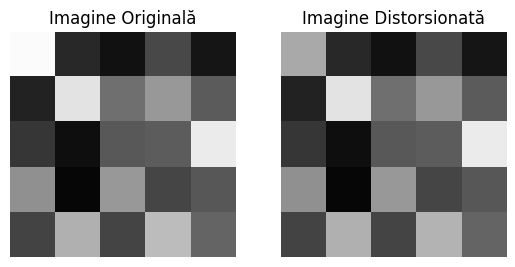

In [2]:
import numpy as np
import matplotlib.pyplot as plt

original_image = np.random.randint(0, 256, size=(5, 5))

distorted_image = original_image.copy()

num_pixels_to_modify = int(0.1 * original_image.size)

indices_to_modify = np.random.choice(original_image.size, num_pixels_to_modify, replace=False)

for idx in indices_to_modify:
    row, col = divmod(idx, original_image.shape[1])
    distorted_image[row, col] = np.random.randint(0, 256)

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagine OriginalƒÉ")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(distorted_image, cmap='gray', vmin=0, vmax=255)
plt.title("Imagine DistorsionatƒÉ")
plt.axis('off')

plt.show()


In [3]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

model = MarkovNetwork()

for i in range(5):
    for j in range(5):
        # muchii pt vecini
        if i > 0:
            model.add_edge((i, j), (i-1, j))  #nord
        if i < 4:
            model.add_edge((i, j), (i+1, j))  #sud
        if j > 0:
            model.add_edge((i, j), (i, j-1))  #vest
        if j < 4:
            model.add_edge((i, j), (i, j+1))  #est


In [ ]:
lambda_reg = 0.5
factors = []

for i in range(5):
    for j in range(5):
        yi = distorted_image[i, j]

        observed_penalty = [np.exp(-lambda_reg * (xi - yi) ** 2) for xi in range(256)]

        factor = DiscreteFactor([(i, j)], [256], observed_penalty)
        factors.append(factor)
        model.add_factors(factor)

for i in range(5):
    for j in range(5):
        if i < 4:
            model.add_edge((i, j), (i + 1, j))
        if j < 4:
            model.add_edge((i, j), (i, j + 1))

for (i, j) in model.nodes():
    neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
    for neighbor in neighbors:
        if neighbor in model.nodes():
            factor = DiscreteFactor([(i, j), neighbor], [256, 256], [1 for _ in range(256 * 256)])
            model.add_factors(factor)
            model.add_edge((i, j), neighbor)



inference = BeliefPropagation(model)
map_estimate = inference.map_query(variables=[(i, j) for i in range(5) for j in range(5)])

image_denoised = np.array([[map_estimate[(i, j)] for j in range(5)] for i in range(5)])
print("Imaginea estimatƒÉ:\n", image_denoised)
